# 1. Import lib


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option("display.float_format", "{:.1f}".format)

# Add data


In [155]:
df = pd.read_csv('movies_data_processed.csv')
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


In [156]:
df.head()

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [157]:
df.isnull().sum()

name               0
genres             0
type               0
rating           244
no_of_votes      244
meta_score      4348
release_date      58
gross           4461
budget          4887
countries         36
url                0
ROI             5140
result             0
dtype: int64

In [158]:
df.dtypes

name             object
genres           object
type             object
rating          float64
no_of_votes     float64
meta_score      float64
release_date    float64
gross           float64
budget          float64
countries        object
url              object
ROI             float64
result           object
dtype: object

Điều kiện để dánh giá phim tốt <br>
rating > 7.5 <br>
meta_score > 72 <br>

# 2. Phân tích data theo địa lý và quốc gia sản xuất (Phần 3)
Mục tiêu: 
- Kiểm tra các mối tương quan giữa các features
- Kiểm tra xem có thể dữ đoán doanh thu dựa vào quốc gia ko, hoặc quốc gia + thể loại + năm.

In [159]:
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


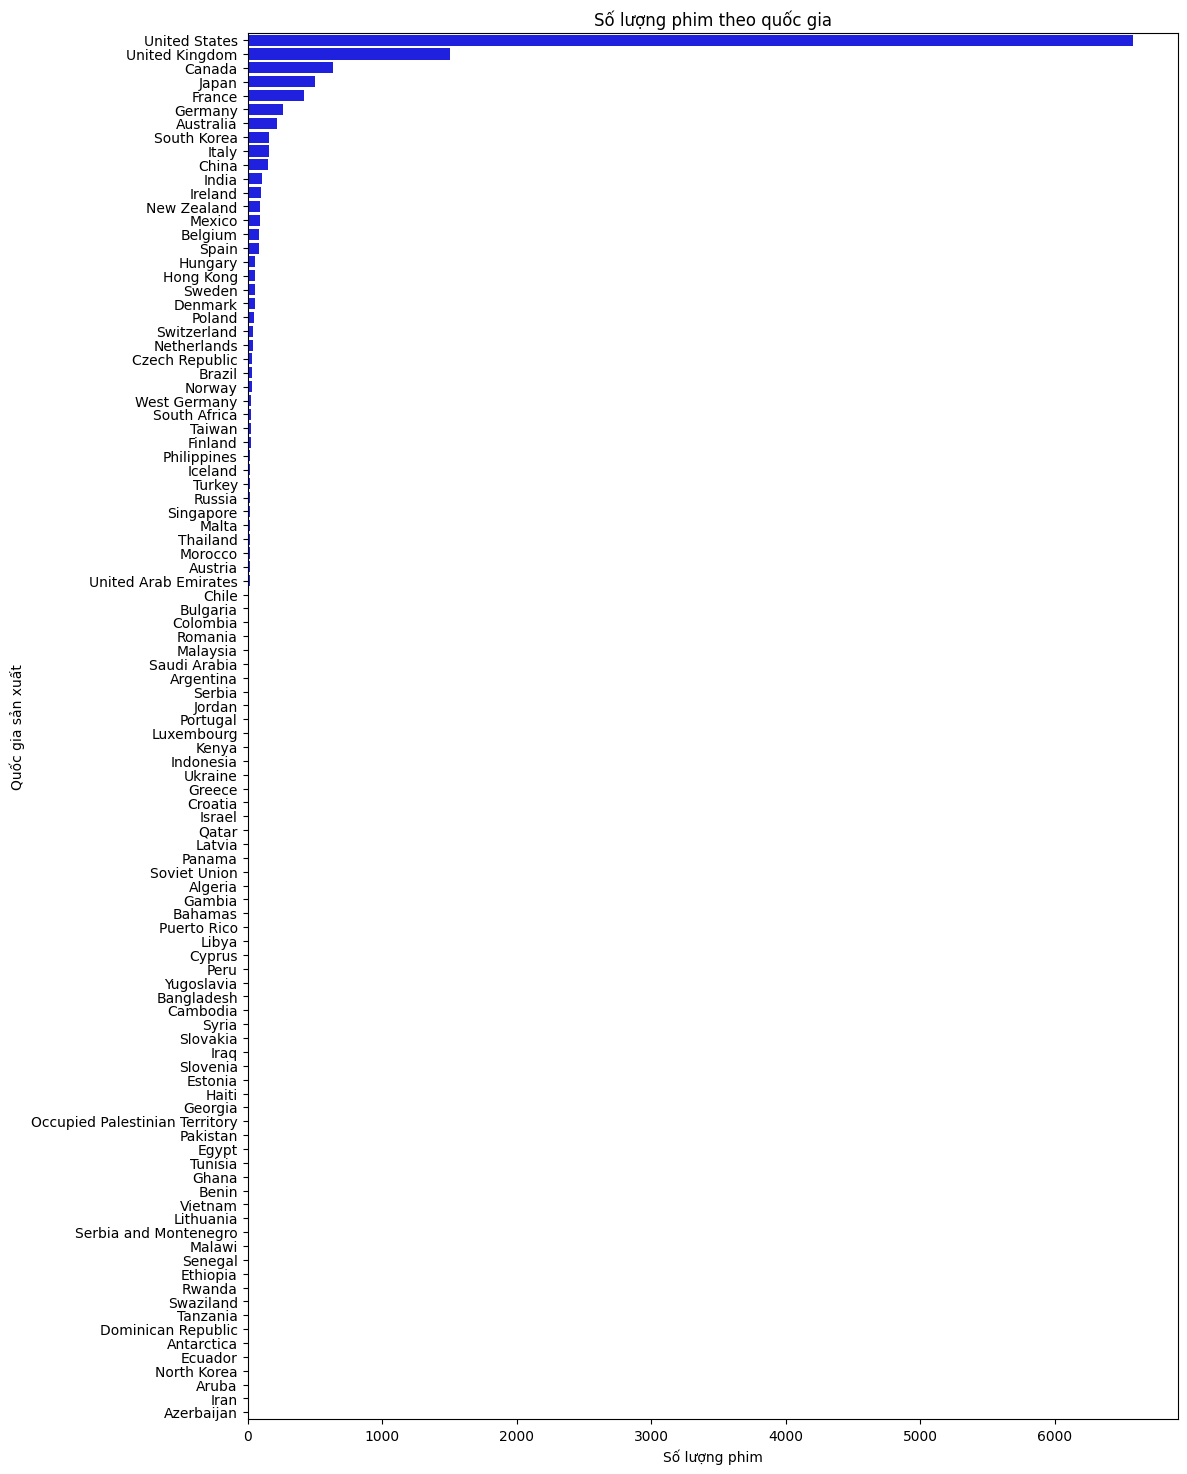

In [160]:
#Tách cột countries các phần tử riêng biệt
df['countries'] = df['countries'].str.split(',')
df = df.explode('countries')
df['countries'] = df['countries'].str.strip()

#Thống kê số lượng phim theo quốc gia
top_countries = df['countries'].value_counts()
plt.figure(figsize=(12, 18))
sns.barplot(x=top_countries.values, y=top_countries.index, color= 'blue')
plt.title("Số lượng phim theo quốc gia")
plt.xlabel("Số lượng phim")
plt.ylabel("Quốc gia sản xuất")
plt.show()


USA là nước sản xuất phim lớn nhất thể giới.

### Nhận xét:
- USA có tổng danh thu cao nhất nhờ có số lượng phim lơn nhất nhưng danh thu mỗi phim ko đồng đều dẫn đến danh thu trung bình ko cao. <br>

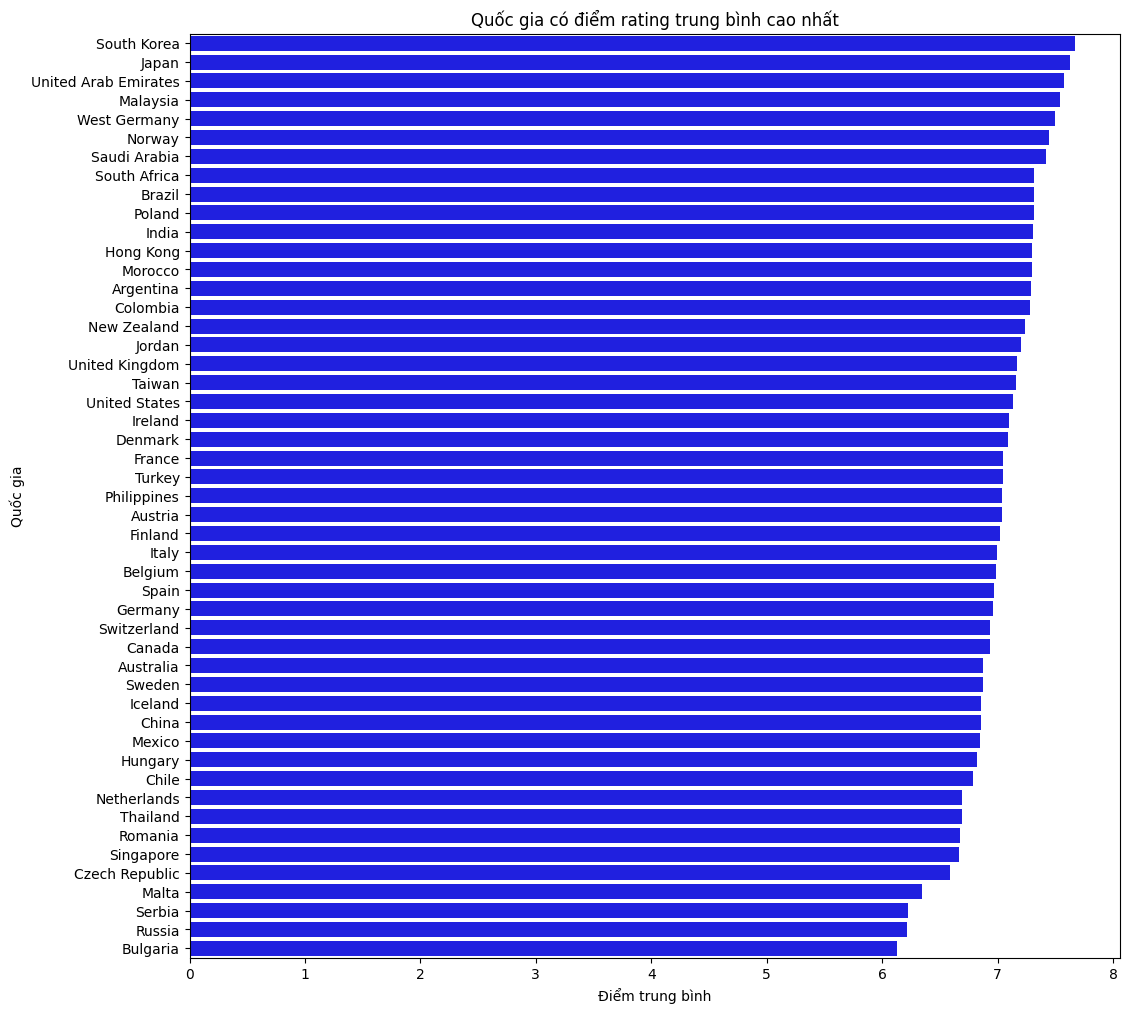

In [161]:
# Tính số lượng phim theo quốc gia
country_counts = df['countries'].value_counts()

# Lọc các quốc gia có ít nhất 100 phim
selected_countries = country_counts[country_counts >= 10].index

# Lọc dữ liệu chỉ bao gồm các quốc gia đã chọn
filtered_df = df[df['countries'].isin(selected_countries)]

# Tính rating trung bình theo quốc gia
country_ratings = filtered_df.groupby('countries')['rating'].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 12))
sns.barplot(x=country_ratings.values, y=country_ratings.index, color='blue')
plt.title("Quốc gia có điểm rating trung bình cao nhất")
plt.xlabel("Điểm trung bình")
plt.ylabel("Quốc gia")
plt.show()

Tuy nhiên, điểm đánh gia cao nhất lại thuộc về các nước châu Á <br>
Chọn ra các nước có ảnh hướng lớn đến ngành công nghiệp phim để phân tích: <br>
- United States (Mỹ) <br>
- United Kingdom (Anh) <br>
- South Korea (Hàn Quốc) <br>
- Japan (Nhật Bản) <br>
- India (Ấn Độ) <br>
- France (Pháp) <br>
- Italy(ý) <br>
- Australia (Úc) <br>
- China <br>
Việt Nam có quá ít dữ liệu

In [162]:
# Chọn ra các quốc gia tiêu biểu theo số lượng và rate
selected_countries = ['United States', 'United Kingdom', 'South Korea', 'Japan', 'India', 'France', 'Italy', 'Australia', 'China']

# Lọc dữ liệu chỉ bao gồm các quốc gia đã chọn
filtered_df = df[df['countries'].isin(selected_countries)]
filtered_df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,United States,https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,Japan,https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


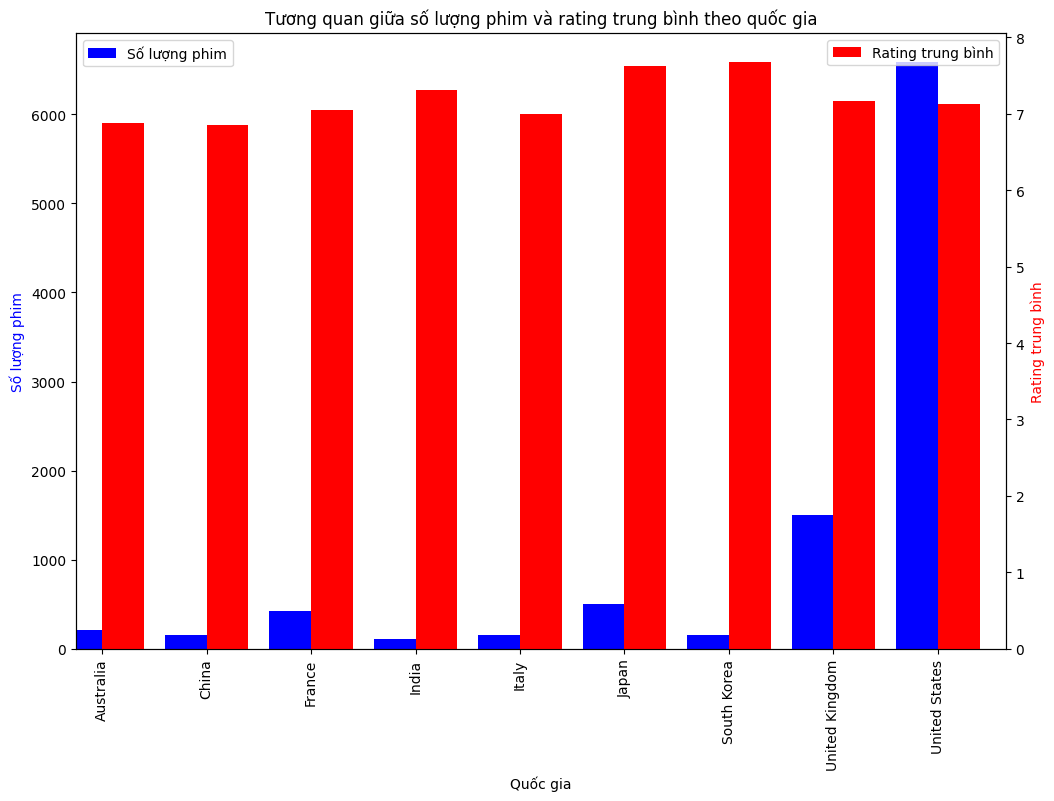

In [163]:
# Tính số lượng phim theo quốc gia
country_counts = filtered_df['countries'].value_counts()

# Tính rating trung bình theo quốc gia
country_ratings = filtered_df.groupby('countries')['rating'].mean()

# Tạo DataFrame mới từ 2 Series đã tính
country_df = pd.DataFrame({'number_of_movies': country_counts, 'average_rating': country_ratings})

# Vẽ biểu đồ cột đôi
fig, ax1 = plt.subplots(figsize=(12, 8))

# Vẽ cột số lượng phim
country_df['number_of_movies'].plot(kind='bar', color='b', ax=ax1, position=1, width=0.4, label='Số lượng phim')
ax1.set_ylabel('Số lượng phim', color='b')
ax1.set_xlabel('Quốc gia')
ax1.set_title("Tương quan giữa số lượng phim và rating trung bình theo quốc gia")

# Tạo trục y thứ hai cho rating trung bình
ax2 = ax1.twinx() # tạo cột chung với cột số lượng phim
country_df['average_rating'].plot(kind='bar', color='r', ax=ax2, position=0, width=0.4, label='Rating trung bình')
ax2.set_ylabel('Rating trung bình', color='r')

# Thêm chú thích
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Xoay tên quốc gia để hiển thị ngang
plt.xticks(rotation=0)

plt.show()

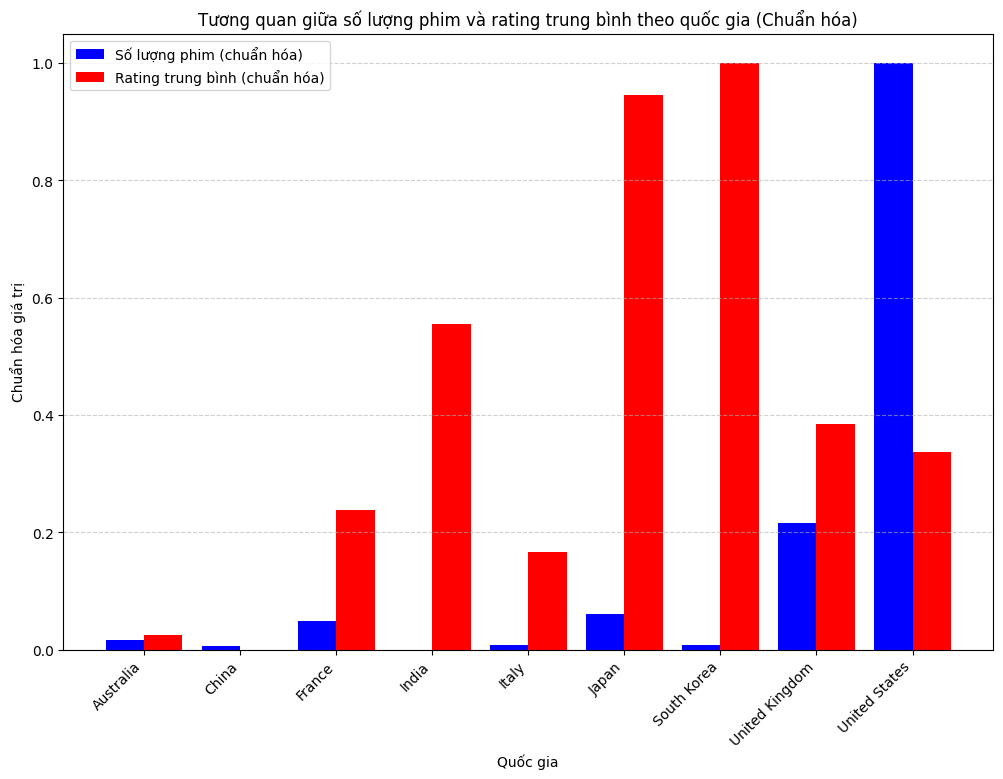

In [164]:
# Tính số lượng phim theo quốc gia
country_counts = filtered_df['countries'].value_counts()
country_ratings = filtered_df.groupby('countries')['rating'].mean()

# Tạo DataFrame mới
country_df = pd.DataFrame({'number_of_movies': country_counts, 'average_rating': country_ratings})

# Chuẩn hóa dữ liệu về khoảng [0,1]
scaler = MinMaxScaler()
country_df[['number_of_movies', 'average_rating']] = scaler.fit_transform(country_df[['number_of_movies', 'average_rating']])

# Thiết lập vị trí cột
countries = country_df.index
x = np.arange(len(countries))  # Vị trí các quốc gia
width = 0.4  # Độ rộng mỗi cột

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))

# Cột số lượng phim (màu xanh)
bars1 = ax.bar(x - width/2, country_df['number_of_movies'], width, color='blue', label="Số lượng phim (chuẩn hóa)")

# Cột rating trung bình (màu đỏ)
bars2 = ax.bar(x + width/2, country_df['average_rating'], width, color='red', label="Rating trung bình (chuẩn hóa)")

# Cấu hình trục
ax.set_xlabel("Quốc gia")
ax.set_ylabel("Chuẩn hóa giá trị")
ax.set_title("Tương quan giữa số lượng phim và rating trung bình theo quốc gia (Chuẩn hóa)")
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Hiển thị chú thích
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Hiển thị biểu đồ
plt.show()

Số lượng phim ko quá ảnh hướng đến rating <br>
Tuy nhiên, các nước có số lượng phim quá lớn thường ko có rating cao

Nhận xét chung: 
- Xu hướng số lượng phim

United States, United Kingdom, Nhật Bản, Hàn Quốc, Pháp: Số lượng phim tăng dần theo thời gian, đặc biệt từ khoảng năm 2000 trở đi.
Ấn Độ: Xu hướng số lượng phim có vẻ dao động mạnh, không tăng ổn định như các quốc gia khác.
- Xu hướng rating trung bình

Hầu hết các quốc gia có rating trung bình dao động nhưng không có sự tăng giảm quá rõ rệt.
Một số quốc gia như Ấn Độ, Nhật Bản có rating trung bình cao hơn so với những nước khác.
- Mối quan hệ giữa số lượng phim và rating trung bình

Ở một số quốc gia như Mỹ và Anh, số lượng phim tăng mạnh nhưng rating trung bình không có xu hướng giảm, chứng tỏ chất lượng phim không bị ảnh hưởng tiêu cực khi số lượng phim tăng.
Ở Ấn Độ, số lượng phim có giai đoạn giảm nhưng rating trung bình vẫn duy trì ở mức cao, có thể do sự chọn lọc trong sản xuất phim chất lượng hơn.

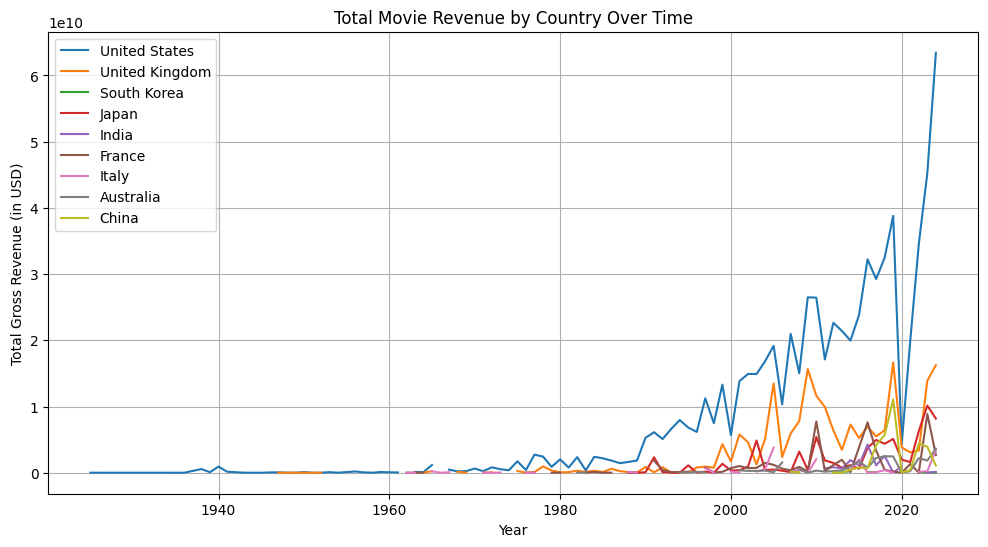

In [165]:
# Danh sách các quốc gia tiêu biểu
selected_countries = [
    'United States', 'United Kingdom', 'South Korea', 'Japan',
    'India', 'France', 'Italy', 'Australia', 'China'
]

# Lọc dữ liệu chỉ bao gồm các quốc gia đã chọn
filtered_df = df[df['countries'].isin(selected_countries) & (df['release_date'] <2025)]

# Loại bỏ các dòng có giá trị NaN trong 'release_date' hoặc 'gross'
filtered_df = filtered_df.dropna(subset=['release_date', 'gross'])

# Chuyển đổi 'release_date' thành kiểu số nguyên (năm)
filtered_df['release_date'] = filtered_df['release_date'].astype(int)

# Nhóm dữ liệu theo năm và quốc gia, tính tổng doanh thu
revenue_by_year_country = filtered_df.groupby(['release_date', 'countries'])['gross'].sum().unstack()

# Vẽ biểu đồ doanh thu theo thời gian cho từng quốc gia
plt.figure(figsize=(12, 6))
for country in selected_countries:
    if country in revenue_by_year_country.columns:
        plt.plot(revenue_by_year_country.index, revenue_by_year_country[country], label=country)

plt.xlabel("Year")
plt.ylabel("Total Gross Revenue (in USD)")
plt.title("Total Movie Revenue by Country Over Time")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_19936\3416088101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="countries", y="gross", data=filtered_df, palette="coolwarm")


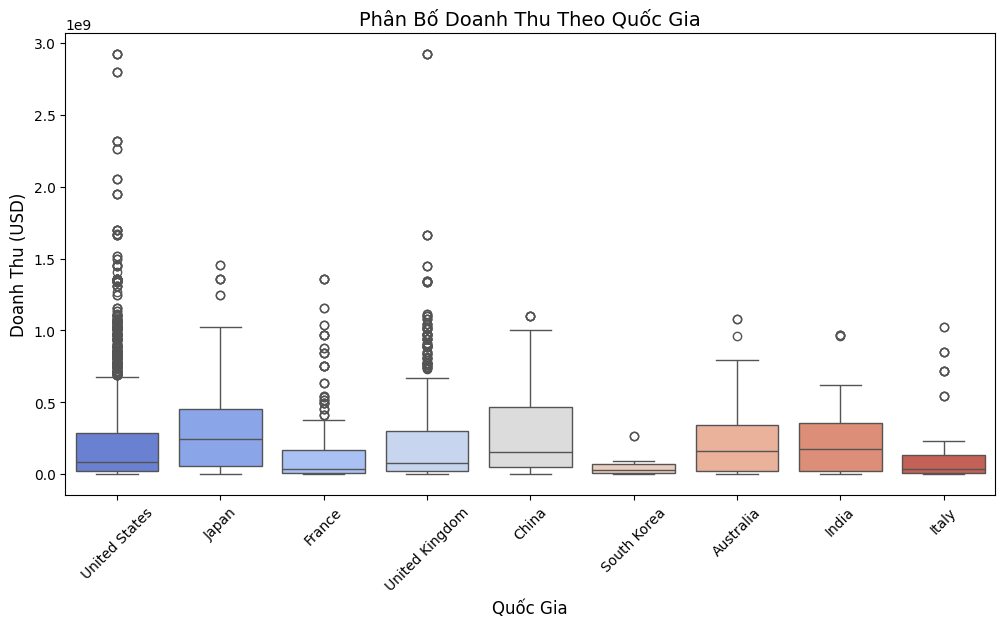

In [166]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="countries", y="gross", data=filtered_df, palette="coolwarm")

# Thiết lập tiêu đề và nhãn
plt.title("Phân Bố Doanh Thu Theo Quốc Gia", fontsize=14)
plt.xlabel("Quốc Gia", fontsize=12)
plt.ylabel("Doanh Thu (USD)", fontsize=12)
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()

<Axes: xlabel='gross', ylabel='Count'>

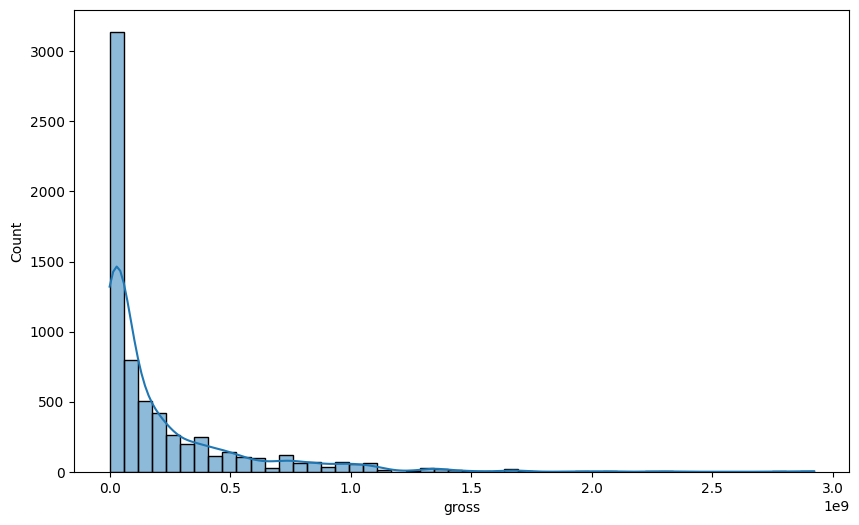

In [167]:
# Kiểm tra phân phối doanh thu
df['gross'].describe()
# Vẽ biểu đồ phân phối doanh thu
plt.figure(figsize=(10, 6))
sns.histplot(df['gross'], bins=50, kde=True)

- Doanh thu có nhiều ngoại lệ

Biên dưới: -725707903.0, Biên trên: 1002619320.0
Kích thước dữ liệu ban đầu: 12182, sau khi lọc: 12182


<Axes: xlabel='gross', ylabel='Count'>

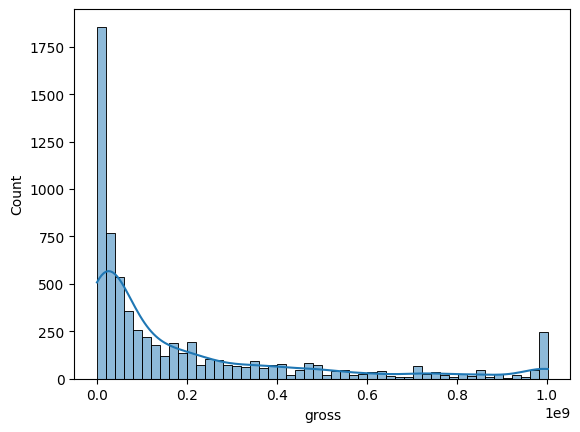

In [168]:
#Xử lý ngoại lệ
# Tính toán Q1, Q3 và IQR
Q1 = df["gross"].quantile(0.25)  # 1st Quantile (25%)
Q3 = df["gross"].quantile(0.75)  # 3rd Quantile (75%)
IQR = Q3 - Q1  # Interquartile Range

# Tính biên dưới và biên trên
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Xử lý ngoại lệ: Gán giá trị nhỏ hơn biên dưới về biên dưới
df["gross"] = df["gross"].apply(lambda x: lower_bound if x < lower_bound else x)
df["gross"] = df["gross"].apply(lambda x: upper_bound if x > upper_bound else x)

print(f"Biên dưới: {lower_bound}, Biên trên: {upper_bound}")
print(f"Kích thước dữ liệu ban đầu: {df.shape[0]}, sau khi lọc: {df.shape[0]}")
sns.histplot(df['gross'], bins=50, kde=True)

### Mã hóa dữ liệu type, genres, countries
- Type: chỉ có 2 loại movie và TV series --> mã hóa label encoding
- Genres: khoảng 40 loại --> mã hóa với features hashing để giảm số lượng features
- Countries: chỉ lấy 10 quốc gia để phân tích --> mã hóa onehot encoding

### Chuẩn hóa dữ liệu cho rating
- Vì rating giữa các quốc gia có sự chênh lệch quá nhỏ, khoảng 1-2: cần chuẩn hóa lại theo z-score

In [169]:
# Loại bỏ các dòng có giá trị NaN trong các cột quan trọng
df = df.dropna(subset=['type', 'countries', 'gross', 'release_date', 'rating'])

# Mã hóa 'type' (Label Encoding vì chỉ có Movie và TV Series)
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Chọn các quốc gia có nhiều hơn 100 phim
popular_countries = df['countries'].value_counts()
top_countries = popular_countries[popular_countries > 10].index
df = df[df['countries'].isin(top_countries)]

# Mã hóa 'countries' bằng One-Hot Encoding (Chỉ giữ các quốc gia đã lọc)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Tránh dummy variable trap
onehot_countries = onehot_encoder.fit_transform(df[['countries']])
df_onehot_countries = pd.DataFrame(onehot_countries, columns=onehot_encoder.get_feature_names_out(['countries']))

# Reset index để tránh lỗi khi ghép DataFrame
df_onehot_countries = df_onehot_countries.reset_index(drop=True)
df = df.reset_index(drop=True)

# Kết hợp tất cả các features vào một DataFrame
df_encoded = pd.concat(
    [df[['release_date', 'rating', 'type_encoded', 'gross']], df_onehot_countries], axis=1
)

# Chuẩn hóa 'gross_log' theo Z-score
df_encoded["gross_log"] = np.log1p(df_encoded["gross"])  # log1p tránh log(0) lỗi
scaler = StandardScaler()
df_encoded["gross_scaled"] = scaler.fit_transform(df_encoded[["gross_log"]])

# Hiển thị kết quả
df_encoded

,release_date,rating,type_encoded,gross,countries_Belgium,countries_Brazil,countries_Bulgaria,countries_Canada,countries_China,countries_Czech Republic,...,countries_Sweden,countries_Switzerland,countries_Taiwan,countries_Thailand,countries_United Arab Emirates,countries_United Kingdom,countries_United States,countries_West Germany,gross_log,gross_scaled
0,2025.0,5.3,0,17235040.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.7,-0.3
1,1995.0,6.5,0,18636537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.7,-0.3
2,1995.0,6.5,0,18636537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7,-0.3
3,2022.0,7.8,0,481757663.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,0.9
4,2022.0,7.8,0,481757663.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,1992.0,8.2,0,159167799.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.9,0.5
6487,2016.0,5.8,0,20672.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.9,-2.9
6488,1953.0,7.2,0,7150.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.9,-3.3
6489,2002.0,7.2,0,122563539.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.6,0.4


In [170]:
encoded_file_path = "movies_data_encoded.csv"

In [171]:
# Xuất ra file CSV
df_encoded.to_csv(encoded_file_path, index=False)

In [174]:
df_encoded = pd.read_csv(encoded_file_path)
df_encoded.head()

,release_date,rating,type_encoded,gross,countries_Belgium,countries_Brazil,countries_Bulgaria,countries_Canada,countries_China,countries_Czech Republic,...,countries_Sweden,countries_Switzerland,countries_Taiwan,countries_Thailand,countries_United Arab Emirates,countries_United Kingdom,countries_United States,countries_West Germany,gross_log,gross_scaled
0,2025.0,5.3,0,17235040.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.7,-0.3
1,1995.0,6.5,0,18636537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.7,-0.3
2,1995.0,6.5,0,18636537.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.7,-0.3
3,2022.0,7.8,0,481757663.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,0.9
4,2022.0,7.8,0,481757663.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.9
